In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# path1 = "../NoneqTrans2/Data_test/80x80/vrun2_d1_40/"
path1 = "../NoneqTrans2/Data_test/par_set1/vrun1_d2_85/"
# path1 = "../../../../../../Volumes/Kunal_EHD/Work/Codes/RS_data_122920/par_set1_cbc/vrun1_d1_90/"
# Python Data Single run
A1 = np.loadtxt(path1 + "delta_f2py_test.dat")
nn = np.size(A1,0)
print(np.shape(A1))

#### Python Data Voltage Up
E_up = A1[:,0]
# T_up = A1[:,0]
delta_up = A1[:,1]
I_up = A1[:,6]
Vs_up = A1[:,4]
R_up = A1[:,7]
# dR_up = A1[:,9]
mx = 64
my = 64

inputs = open(path1+"input_par.dat", "r")
Nsamp = 512
maxdist = mx//2

V_crit = 672.0 #691.2
V_metal = 998.4 #992.0

# V_crit = 537.6
# V_metal = 697.6

# V_crit = 844.8
print(inputs.read())

(200, 11)
{'mx': 64, 'my': 64, 'nwarm': 400000, 'nskip': 16, 'Tc': 1.0, 'coef': 0.1, 'dphi': 0.2, 'gamma': 0.1, 'r0': 3.5, 'g2': 1.0, 'g4': -1.0, 'g6': 0.5, 'Rload': 1.0, 'mfphi': False, 'tloop': False}{'Tcrit': 1.32, 'dE': 0.1, 'minE': 0.1, 'maxE': 20.1, 'dTb': 0.01, 'minT': 0.01, 'maxT': 2.01, 'nmeas': 2048, 'Tbath': 0.85, 'seed': 2384824, 'NPEs': 1, 'iphi': True}


In [4]:
k1 = int(np.argwhere((E_up*my)//1 == 352))
k2 = int(np.argwhere((E_up*my)//1 == 652))
k3 = int(np.argwhere((E_up*my) == V_crit))
k4 = int(np.argwhere((E_up*my)//1 == 800))
k5 = int(np.argwhere((E_up*my) == V_metal))
k6 = int(np.argwhere((E_up*my)//1 == 1260))
print(k1,k2,k3,k4,k5,k6)
karr = np.array([k1,k2,k3,k4,k5,k6])
print(E_up[karr]*my)


54 101 104 124 155 196
[ 352.   652.8  672.   800.   998.4 1260.8]


No handles with labels found to put in legend.


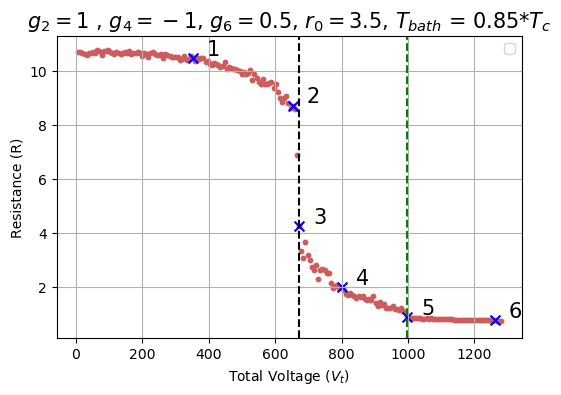

In [5]:
plt.scatter(E_up*my,R_up, s=10.0,c="IndianRed")
plt.scatter(E_up[karr]*my,R_up[karr], c = 'blue', s= 50.0, marker = 'x'  )
plt.ylabel('Resistance (R)')
plt.xlabel('Total Voltage ($V_t$)')

# plt.scatter(E_up,delta_up, s=10.0,c="IndianRed", label = r'$\langle \Delta \rangle$')
# plt.ylabel( 'Average $\Delta$')
# plt.xlabel('Bath Temperature (T)')
k = 0
for x,y in zip(E_up[karr]*my,R_up[karr]):
    k += 1 
    label = k

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 size = 15,
                 textcoords="offset points", # how to position the text
                 xytext=(15,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# plt.xlim(18.,30.)
plt.axvline(x=V_crit, linestyle = 'dashed' , color = 'black')
plt.axvline(x=V_metal, linestyle = 'dashed' , color = 'green')
plt.title('$g_2 = 1$ , $g_4 = -1$, $g_6 = 0.5$, $r_0 = 3.5$, $T_{bath}$ = 0.85*$T_c$' , fontsize = 15)
plt.grid(b=True,which='major', axis='both')
plt.legend()

plt.savefig(path1 + "Resitance_v_Field_2.pdf")
plt.show()

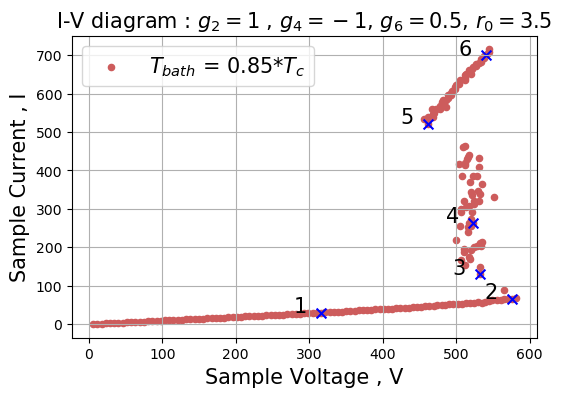

In [6]:
plt.scatter(Vs_up, I_up, s = 20.0, c = 'IndianRed', label='$T_{bath}$ = 0.85*$T_c$' , marker = 'o')
plt.scatter(Vs_up[karr],I_up[karr], c = 'blue', s= 50.0, marker = 'x'  )
# plt.plot(Vs_up, I_up,  c = 'IndianRed')

k = 0 
for x,y in zip(Vs_up[karr],I_up[karr]):
    k += 1 
    label = k

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 size = 15,
                 textcoords="offset points", # how to position the text
                 xytext=(-15,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# plt.plot(Data_Set[:,0],Data_Set[:,1])
plt.legend(fontsize = 15)
plt.title('I-V diagram : $g_2 = 1$ , $g_4 = -1$, $g_6 = 0.5$, $r_0 = 3.5$' , fontsize = 15)
# plt.title('I-V diagram , $n_{skip}$=32, $E$ = 0.1')
plt.xlabel('Sample Voltage , V', fontsize = 15 )
plt.ylabel('Sample Current , I', fontsize = 15 )
# plt.xlim(14.0,22.)
plt.grid(b=True,which='major', axis='both')
plt.savefig(path1 + "I-V_2.pdf")

plt.show()

(200, 32) (200, 32)


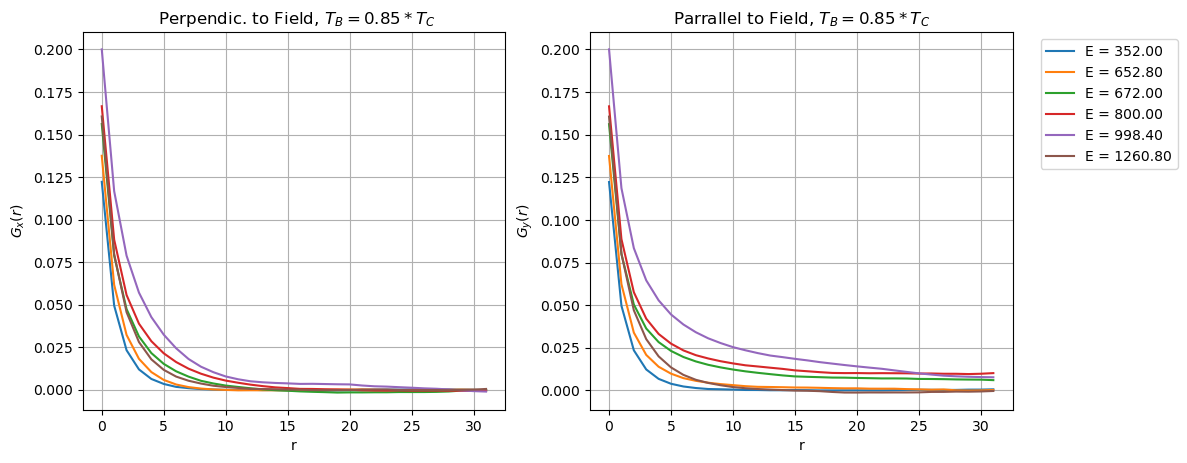

In [8]:
G_x = np.loadtxt(path1 + "gofr_x2.dat")
G_y = np.loadtxt(path1 + "gofr_y2.dat")

print(np.shape(G_x), np.shape(G_y))
# maxdist = np.shape(G_x)[1]
# print(maxdist)


x_ax = np.arange(0.01,maxdist+0.01)
upper = V_crit
lower = 0

f = plt.figure(figsize=(12, 5)); # plot the calculated values    
# plt.title("Average Correlation plots")

sp =  f.add_subplot(1, 2, 1 );
for k in karr:
#     if E_up[k]*my == V_crit:
#         plt.plot(x_ax,G_x[k,:],label = "E = " + format(E_up[k]*(my), '.2f'), linestyle = 'dashed' )
#     elif E_up[k]*my > lower and E_up[k]*my < upper :
# #         if k%4 == 0:
    plt.plot(x_ax,G_x[k,:],label = "E = " + format(E_up[k]*(my), '.2f') )
#     else:
#         None

plt.title(r' Perpendic. to Field, $T_B = 0.85*T_C$')

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_x(r)$')
plt.xlabel('r')
   
# plt.show()    


sp =  f.add_subplot(1, 2, 2 );
for k in karr:
#     if E_up[k]*my == V_crit:
#         plt.plot(x_ax,G_y[k,:],label = "E = " + format(E_up[k]*(my), '.2f'), linestyle = 'dashed' )
#     elif E_up[k]*my > lower and E_up[k]*my < upper :
# #         if k%4 == 0:
    plt.plot(x_ax,G_y[k,:],label = "E = " + format(E_up[k]*(my), '.2f') )
#     else:
#         None


plt.title(r'Parrallel to Field, $T_B = 0.85*T_C$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_y(r)$')
plt.xlabel('r')  
# plt.show()


plt.savefig(path1 + "gofr_85%_select.pdf",bbox_inches='tight')